# Simple example

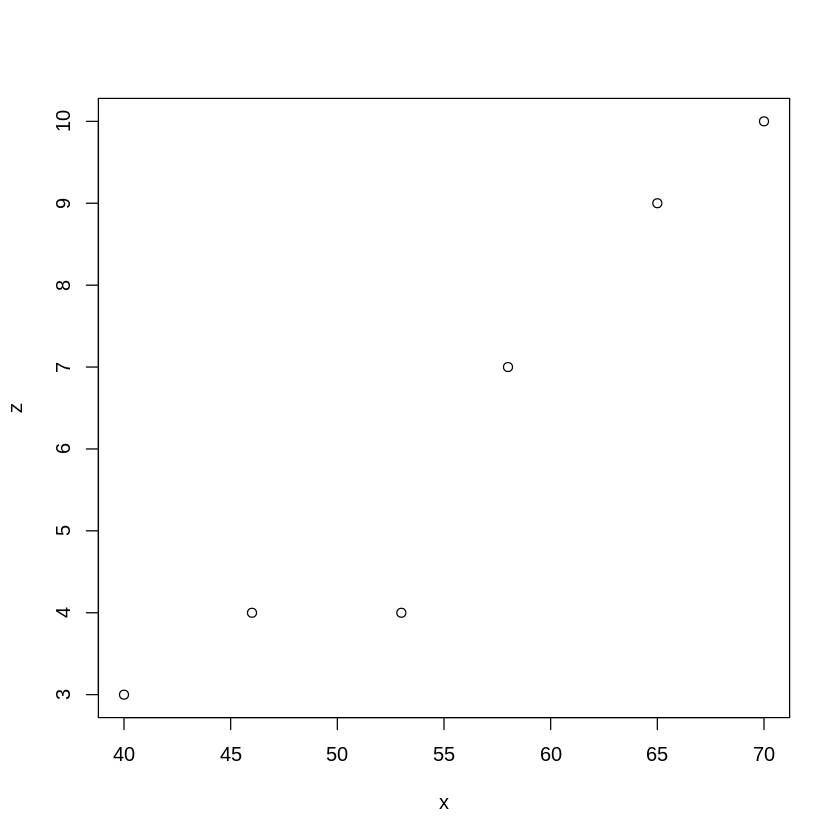

In [0]:
x=c(40,46,53,58,65,70)
z=c(3,4,4,7,9,10)
plot(x,z)

In [0]:
n <- length(z) ; n

[1] 6

Estimator of a

In [0]:
a_estim <- (sum(x*z)-n*mean(x)*mean(z))/(sum(x**2)-n*mean(x)^2)
a_estim

[1] 0.2481865

Estimator of b

In [0]:
b_estim <- mean(z)-a_estim*mean(x)
b_estim

[1] -7.566321

In [0]:
y_estim <- a_estim*x+b_estim
y_estim

[1] 2.361140 3.850259 5.587565 6.828497 8.565803 9.806736

In [0]:
residues <- z - y_estim
residues
sct <- sum((z-mean(z))^2)
sct
scr <- sum(residues^2)
scr

[1]  0.6388601  0.1497409 -1.5875648  0.1715026  0.4341969  0.1932642

[1] 42.83333

[1] 3.206218

In [0]:
sce <- sct - scr ; sce
r2 <- 1 - scr/sct ; r2

[1] 39.62712

[1] 0.9251467

In [0]:
# adjusted coefficient of determination
r2a <- 1 - (n-1)/(n-1-1)*(1-r2)
r2a

[1] 0.9064333

In [0]:
var_resi <- scr/(n-2)
var_resi

[1] 0.8015544

In [0]:
# regression with the use of function "lm"
reg <- lm(z~x)
summary(reg)


Call:
lm(formula = z ~ x)

Residuals:
      1       2       3       4       5       6 
 0.6389  0.1497 -1.5876  0.1715  0.4342  0.1933 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -7.5663     1.9870  -3.808  0.01898 * 
x             0.2482     0.0353   7.031  0.00216 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8953 on 4 degrees of freedom
Multiple R-squared:  0.9251,	Adjusted R-squared:  0.9064 
F-statistic: 49.44 on 1 and 4 DF,  p-value: 0.002156


In [0]:
# confidence interval
confint(reg,level=0.95)

,2.5 %,97.5 %
(Intercept),-13.0832666,-2.0493758
x,0.1501839,0.3461891


speed,dist
<dbl>,<dbl>
4,2
4,10
7,4
7,22
8,16
9,10


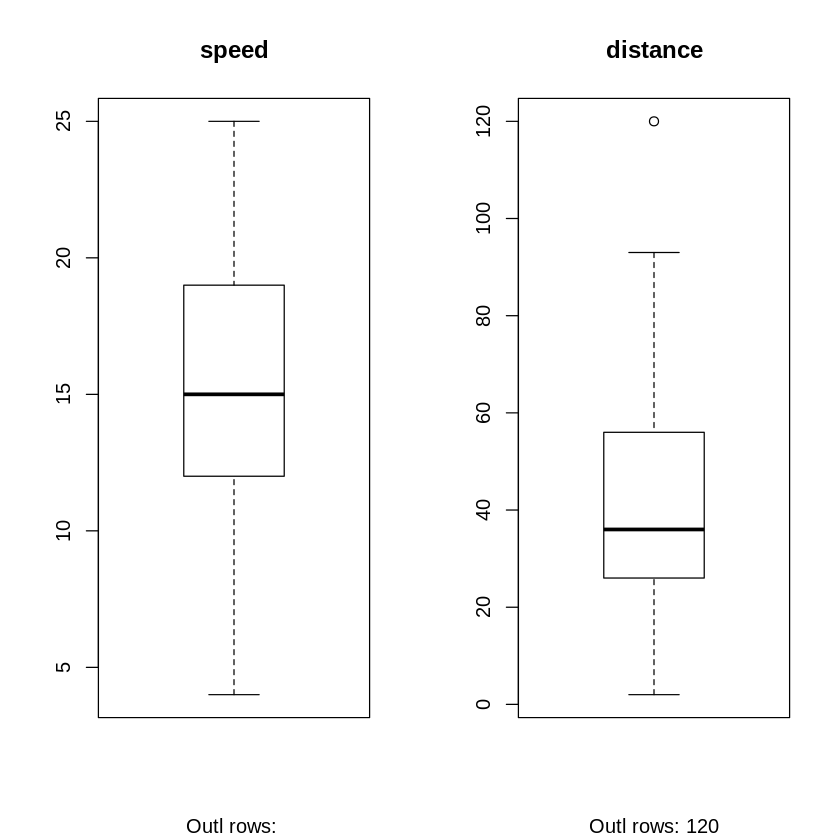

In [0]:
head(cars)
par(mfrow=c(1,2))
#box plot for "speed"
boxplot(cars$speed, main='speed', sub=paste("Outl rows:", boxplot.stats(cars$speed)$out))
#box plot for "distance"
boxplot(cars$dist, main='distance', sub=paste("Outl rows:", boxplot.stats(cars$dist)$out))

In [0]:
# density plot - check if the response variable is normal
#library(e1071)
#par(mfrow=c(1,2))
#plot(density(cars$speed, main="Density Plot: Speed", ylab="Frequency"), sub=paste("Skewness:", round(e10)))

linearMod <- lm(dist~speed, data=cars)
print(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



In [0]:
#model summary
summary(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [0]:
install.packages('AER')
library(AER)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘nloptr’, ‘RcppEigen’, ‘pbkrtest’, ‘lme4’, ‘car’

Loading required package: car
Loading required package: carData
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival


In [0]:
#CollegeDistance <- 
data(CollegeDistance)
names(CollegeDistance)
head(CollegeDistance)

[1] "gender"    "ethnicity" "score"     "fcollege"  "mcollege"  "home"     
 [7] "urban"     "unemp"     "wage"      "distance"  "tuition"   "education"
[13] "income"    "region"

gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
male,other,39.15,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
female,other,48.87,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
male,other,48.74,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
male,afam,40.40,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
female,other,40.48,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other
male,other,54.71,no,no,yes,yes,5.6,8.09,0.4,0.88915,12,low,other


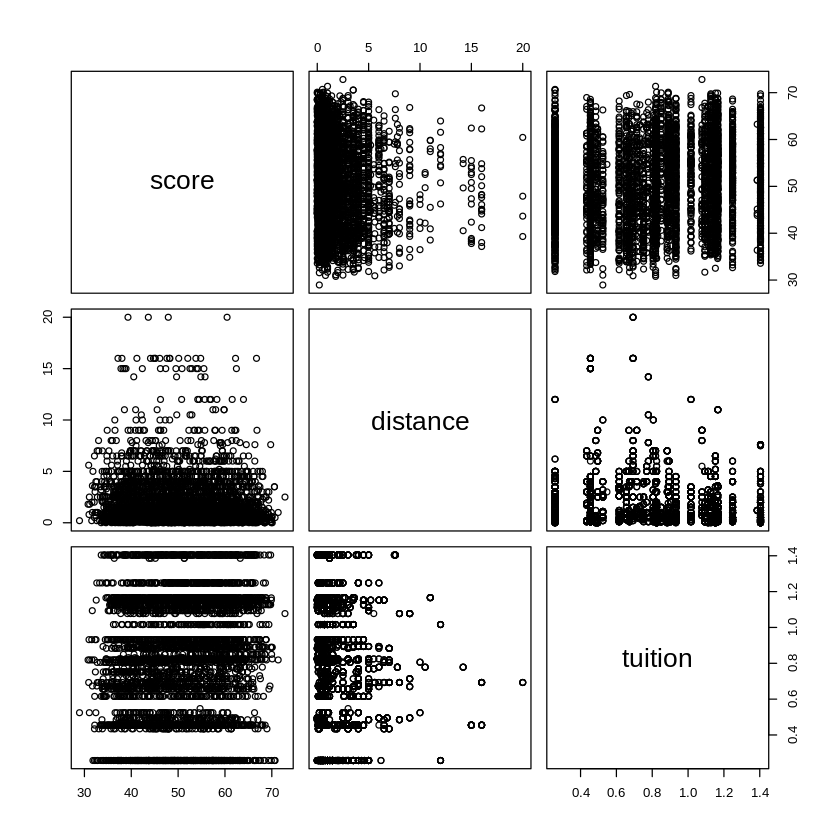

In [0]:
# checking multicollinearity
plot(CollegeDistance[c(3,10,11)])

In [0]:
#correlation matrix
cor(CollegeDistance[c(3,10,11)])

,score,distance,tuition
score,1.00000000,-0.06797927,0.1298585
distance,-0.06797927,1.00000000,-0.1009806
tuition,0.12985848,-0.10098058,1.0000000


In [0]:
# creating model
schoolmod <- lm(education~score+tuition+distance+urban, data=CollegeDistance)
summary(schoolmod) # R value is 


Call:
lm(formula = education ~ score + tuition + distance + urban, 
    data = CollegeDistance)

Residuals:
   Min     1Q Median     3Q    Max 
-3.826 -1.181 -0.246  1.219  5.367 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.141015   0.148905  61.388  < 2e-16 ***
score        0.095596   0.002679  35.686  < 2e-16 ***
tuition     -0.142627   0.068517  -2.082   0.0374 *  
distance    -0.048723   0.010539  -4.623 3.88e-06 ***
urbanyes     0.025619   0.057090   0.449   0.6536    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.58 on 4734 degrees of freedom
Multiple R-squared:  0.221,	Adjusted R-squared:  0.2203 
F-statistic: 335.7 on 4 and 4734 DF,  p-value: < 2.2e-16


In [0]:
# educational_attainment = 9.14+0.10*Achievement_scor-.14*tuition-0.05*distance+0.03*is_urban

In [0]:
#confidence intervals
confint(schoolmod)

,2.5 %,97.5 %
(Intercept),8.84909261,9.432937106
score,0.09034461,0.100848185
tuition,-0.27695296,-0.008301033
distance,-0.06938312,-0.028062221
urbanyes,-0.08630305,0.137541361


In [0]:
# making predictions
(urban <- 9.14+0.10*52-0.14*0.900-0.05*0.5+0.03)
(not_urban <- 9.14+0.10*52-0.14*0.900-0.05*0.5)

[1] 14.219

[1] 14.189

In [0]:
# polynomial of degree 0
attach(cars)
lm0 <- lm(dist~1)
lm0
summary(lm0)
mean(dist)

The following objects are masked from cars (pos = 3):

    dist, speed

The following objects are masked from cars (pos = 4):

    dist, speed

The following objects are masked from cars (pos = 5):

    dist, speed




Call:
lm(formula = dist ~ 1)

Coefficients:
(Intercept)  
      42.98  



Call:
lm(formula = dist ~ 1)

Residuals:
   Min     1Q Median     3Q    Max 
-40.98 -16.98  -6.98  13.02  77.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.980      3.644   11.79 6.38e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.77 on 49 degrees of freedom


[1] 42.98

In [0]:
# confidence intervals
alpha <- 0.05
df.new <- data.frame(speed=(6:23))
conf.dist <- predict(linearMod, newdata=df.new, interval="confidence", level=1-alpha)
head(conf.dist)

fit,lwr,upr
6.015358,-2.973341,15.00406
9.947766,1.678977,18.21656
13.880175,6.307527,21.45282
17.812584,10.905120,24.72005
21.744993,15.461917,28.02807
25.677401,19.964525,31.39028


In [0]:
# polynomial of degree 2
lm2 <- lm(dist ~speed+I(speed^2))
summary(lm2)

#R -> 1; p -> 0 but Pr are quite big, which means the model is good on the current data but will not perform well on new datas


Call:
lm(formula = dist ~ speed + I(speed^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-28.720  -9.184  -3.188   4.628  45.152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.47014   14.81716   0.167    0.868
speed        0.91329    2.03422   0.449    0.656
I(speed^2)   0.09996    0.06597   1.515    0.136

Residual standard error: 15.18 on 47 degrees of freedom
Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 
F-statistic: 47.14 on 2 and 47 DF,  p-value: 5.852e-12


In [0]:
x <- model.matrix(lm2) ; head(x)
S <- solve(t(x)%*%x) ; S
d <- sqrt(diag(S)) ; d
R <- S/(d%*%t(d)) ; R

(Intercept),speed,I(speed^2)
1,4,16
1,4,16
1,7,49
1,7,49
1,8,64
1,9,81


,(Intercept),speed,I(speed^2)
(Intercept),0.953260437,-0.1257084885,3.789879e-03
speed,-0.125708489,0.0179670749,-5.707003e-04
I(speed^2),0.003789879,-0.0005707003,1.889517e-05


(Intercept)       speed  I(speed^2) 
0.976350571 0.134041318 0.004346857

,(Intercept),speed,I(speed^2)
(Intercept),1.0000000,-0.9605503,0.8929849
speed,-0.9605503,1.0000000,-0.9794765
I(speed^2),0.8929849,-0.9794765,1.0000000


In [0]:
lm2.noint <- lm(dist ~ -1 +speed+I(speed^2))
coef(lm2.noint)

speed I(speed^2) 
1.23902996 0.09013877

In [0]:
X <- model.matrix(lm2.noint)
head(X)

speed,I(speed^2)
4,16
4,16
7,49
7,49
8,64
9,81


In [0]:
# EXPLORING ADULT DATASET

inputData <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
sep=',',fill=F,strip.white=T)
colnames(inputData) <- c('age','workclass','fnlwgt','education','education_num',
'marital_status','occupation','relationship','race','sex','capital_gain',
'capital_loss','hours_per_week','native_country','income')

In [0]:
head(inputData)
summary(inputData)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                 marital_status 
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

In [0]:
# check class biaises
table(inputData$income)


<=50K  >50K 
24720  7841 

In [0]:
inputData$incomeNum[inputData$income==">50K"] <- 1
inputData$incomeNum[inputData$income=="<=50K"] <- 0
head(inputData)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,incomeNum
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


In [0]:
# prepare train and test set
input_ones <- inputData[which(inputData$incomeNum == 1),] #all ones
input_zeros <- inputData[which(inputData$incomeNum == 0),] #all zeros
set.seed(100)
input_ones_training_rows<-sample(1:nrow(input_ones),0.7*nrow(input_ones))
input_zeros_training_rows<-sample(1:nrow(input_zeros),0.7*nrow(input_ones))
training_ones<-input_ones[input_ones_training_rows,]
training_zeros<-input_zeros[input_zeros_training_rows,]
trainingData<-rbind(training_ones, training_zeros) #training Data
test_ones<-input_ones[-input_ones_training_rows,]
test_zeros<-input_zeros[-input_zeros_training_rows,]
testData<-rbind(test_ones, test_zeros) #test Data
head(trainingData) ; head(testData)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,incomeNum
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
15775,39,Private,33983,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,15024,0,40,United-States,>50K,1
2031,32,Private,211699,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1485,40,United-States,>50K,1
14367,42,Private,87284,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,35,United-States,>50K,1
15463,38,Private,168496,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K,1
25637,35,?,195946,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,>50K,1
29720,44,Private,210525,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,1


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,incomeNum
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
12,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
21,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,1
39,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K,1
46,57,Federal-gov,337895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,>50K,1
56,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,1


In [0]:
#  build model
logitMod <- glm(incomeNum ~ relationship+age+capital_gain+occupation+education_num, data=trainingData, family=binomial(link="logit"))

# predicted scores
predicted <- predict(logitMod, testData, type='response')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [0]:
head(predicted)
?plogis

10        12        21        39        46        56 
0.9816380 0.8021221 0.9275481 0.5933419 0.8976147 0.7034883

In [0]:
# decide in optimal prediction probability cutoff for the model
install.packages('InformationValue')
library(InformationValue)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
optCutOff<-optimalCutoff(testData$incomeNum, predicted)
optCutOff

[1] 0.91

In [0]:
summary(logitMod)


Call:
glm(formula = incomeNum ~ relationship + age + capital_gain + 
    occupation + education_num, family = binomial(link = "logit"), 
    data = trainingData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6410  -0.5380  -0.0058   0.6307   3.3190  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -4.739e+00  2.433e-01 -19.473  < 2e-16 ***
relationshipNot-in-family   -2.240e+00  7.149e-02 -31.329  < 2e-16 ***
relationshipOther-relative  -2.625e+00  2.558e-01 -10.263  < 2e-16 ***
relationshipOwn-child       -3.506e+00  1.818e-01 -19.285  < 2e-16 ***
relationshipUnmarried       -2.384e+00  1.129e-01 -21.112  < 2e-16 ***
relationshipWife             4.882e-01  1.107e-01   4.409 1.04e-05 ***
age                          2.857e-02  2.382e-03  11.995  < 2e-16 ***
capital_gain                 3.393e-04  1.899e-05  17.869  < 2e-16 ***
occupationAdm-clerical       7.623e-01  1.592e-01   4.788 1.68e-06 **

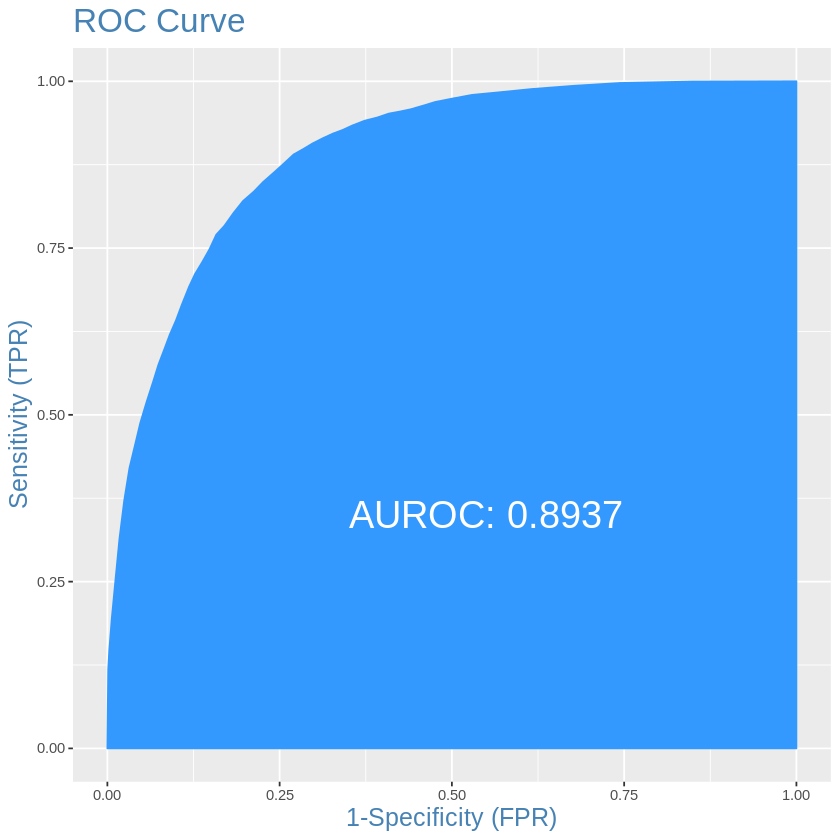

In [0]:
# roc curve is a measure of goodness of model: the highern the bette
# TPR True Positive Rate; FPR False Positive Rate
# Dependence on cutoff lowered from 1 to 0
# the best model should go up very steeply

# roc graph
plotROC(testData$incomeNum, predicted)